# Pitching Statistics
In this assignment, I will use a variety of different plots to exploring baseball pitching statistics between 1871 and 2018.

The dataset I chose was taken from [Lahman’s Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

## Load the Data

In [2]:
df = pd.read_csv('./data/Pitching.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46699 entries, 0 to 46698
Data columns (total 30 columns):
playerID    46699 non-null object
yearID      46699 non-null int64
stint       46699 non-null int64
teamID      46699 non-null object
lgID        46567 non-null object
W           46699 non-null int64
L           46699 non-null int64
G           46699 non-null int64
GS          46699 non-null int64
CG          46699 non-null int64
SHO         46699 non-null int64
SV          46699 non-null int64
IPouts      46699 non-null int64
H           46699 non-null int64
ER          46699 non-null int64
HR          46699 non-null int64
BB          46699 non-null int64
SO          46699 non-null int64
BAOpp       42259 non-null float64
ERA         46607 non-null float64
IBB         32121 non-null float64
WP          46699 non-null int64
HBP         45965 non-null float64
BK          46699 non-null int64
BFP         46696 non-null float64
GF          46699 non-null int64
R           46699 no

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearID,46699.0,1970.476498,38.009031,1871.0,1943.00,1980.000,2003.00,2018.00
stint,46699.0,1.080901,0.287667,1.0,1.00,1.000,1.00,5.00
W,46699.0,4.644468,5.760254,0.0,0.00,2.000,7.00,60.00
L,46699.0,4.644468,4.950416,0.0,1.00,3.000,7.00,48.00
G,46699.0,23.695861,18.557884,1.0,7.00,21.000,35.00,106.00
GS,46699.0,9.341827,12.221776,0.0,0.00,2.000,17.00,75.00
CG,46699.0,3.036403,6.974422,0.0,0.00,0.000,2.00,75.00
SHO,46699.0,0.432921,1.092617,0.0,0.00,0.000,0.00,16.00
SV,46699.0,1.501167,5.003730,0.0,0.00,0.000,1.00,62.00
IPouts,46699.0,250.026617,255.016879,0.0,49.00,163.000,386.00,2040.00


## Helper Functions
These functions will be used to slice the `DataFrame` by baseball division and year. They will be used to make sub-datasets for the various plots that I will display below.

In [5]:
# The six different baseball divisions and their respective teams.
DIVISIONS = {
    'aleast': ['NYA', 'TBA', 'BOS', 'TOR', 'BAL'],
    'alcentral': ['MIN', 'CLE', 'CHA', 'DET', 'KCA'],
    'alwest': ['HOU', 'OAK', 'TEX', 'LAA', 'SEA'],
    'nleast': ['ATL', 'PHI', 'WAS', 'NYN', 'MIA'],
    'nlcentral': ['MIL', 'CHN', 'SLN', 'PIT', 'CIN'],
    'nlwest': ['LAN', 'COL', 'ARI', 'SDN', 'SFN']
}

In [6]:
# Divide dataset by baseball division.
def create_division_subset(df, division=None):
    if division is None:
        print('Including data for all teams.')
        return df
    else:
        print(f'Including data for teams in division {division}.')
        return df[df['teamID'].isin(DIVISIONS[division])].copy()

In [7]:
# Divide dataset by year.
def create_year_subset(df, min_year_thresh=0, max_year_thresh=0):
    min_year = df.yearID.min() + min_year_thresh
    max_year = df.yearID.max() - max_year_thresh
    if min_year_thresh != 0:
        years = f'{df.yearID.min()} - {min_year}'
        sub_df = df[(df.yearID < min_year)].copy()
    elif max_year_thresh != 0:
        years = f'{max_year} - {df.yearID.max()}'
        sub_df =  df[(df.yearID > max_year)].copy()
    else:
        years = f'{df.yearID.min()} - {df.yearID.max()}'
        sub_df =  df.copy()
    print(f'Including data for years {years}.')
    return sub_df

## ERA Trends Since 1871
I will use four different histogram plots to explore ERA trends since 1871.

In [8]:
def plot_era_stats(df, era_thresh, min_year_thresh=0, max_year_thresh=0):
    
    year_subset = create_year_subset(df, min_year_thresh, max_year_thresh)
    
    sub_df = year_subset[year_subset.ERA < era_thresh].copy()
    
    f, axes = plt.subplots(2, 2, figsize=(7, 7))
    
    sns.distplot(sub_df.ERA, ax=axes[0, 0])
    
    sns.distplot(sub_df.ERA, kde=False, ax=axes[0, 1])
    
    sns.distplot(sub_df.ERA, kde=False, bins=20, rug=True, ax=axes[1, 0])
    
    sns.distplot(sub_df.ERA, hist=False, rug=True, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()

Including data for years 1871 - 2018.


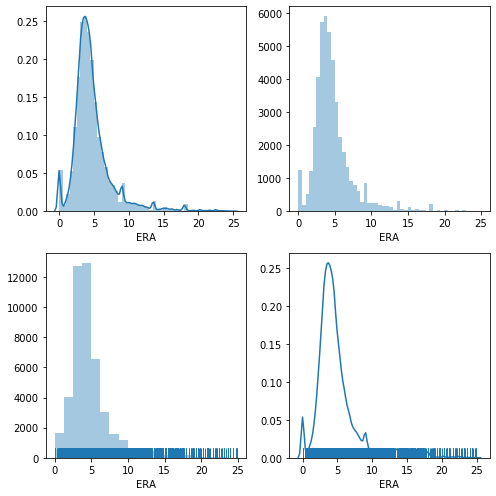

In [9]:
plot_era_stats(df, 25);

**Observations:** 

The top right plot conveys the clearest information. It shows that most ERAs are around 5, with a long, thin trail going off to the right. There are spikes in ERA counts near values of 0, 9, 14, and 18. The 'rug' on both bottom two plots does not provid extra information because there are too many points; the spikes run together.

## Strike Outs vs. Balls for 2018
I now explore the relationship between strike outs and balls for the year 2018.

In [10]:
def strikeouts_vs_balls(df, era_thresh, min_year_thresh=0, max_year_thresh=0):
    
    year_subset = create_year_subset(df, min_year_thresh, max_year_thresh)
    sub_df = year_subset[year_subset.ERA < era_thresh].copy()
    
    sns.jointplot(x='BB', 
                  y='SO',
                  xlim = (0, 350),
                  ylim = (0, 350),
                  data=sub_df,
                  kind='reg')
    
    sns.jointplot(x='BB', 
                  y='SO',
                  xlim = (0, 350),
                  ylim = (0, 350),
                  data=sub_df,
                  kind='hex')
    
    sns.jointplot(x='BB', 
                  y='SO',
                  xlim = (0, 350),
                  ylim = (0, 350),
                  data=sub_df,
                  kind='kde')
    
    plt.show()

Including data for years 2017 - 2018.


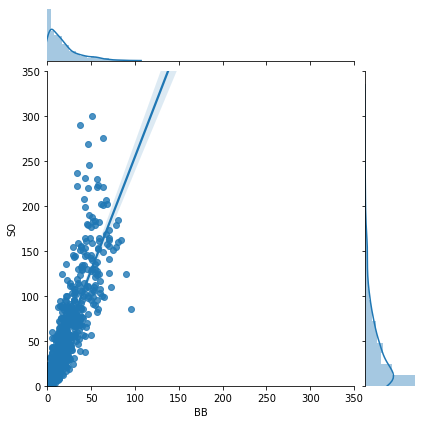

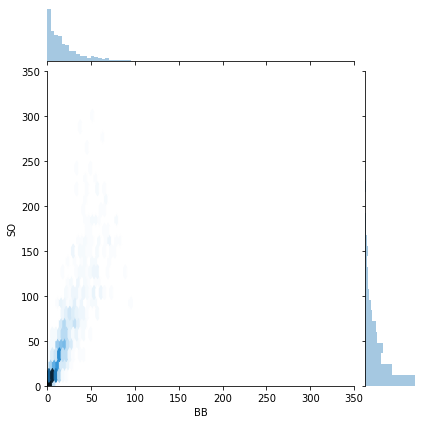

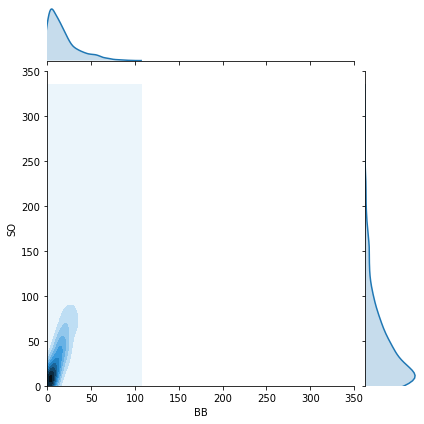

In [11]:
strikeouts_vs_balls(df, 25, min_year_thresh=0, max_year_thresh=1)

**Observations:** 

The steap, positive slope in these plots shows that there are more strike outs thrown than balls in baseball. Plot one shows that for strike out couns great than roughly 180, the number of balls does not proportionally increase. The count density is highly concentrated as shown in plots two and three.

## ERA per Team for 2018
Now I compare ERA for all teams in the National League West.

In [12]:
def era_per_team(df, era_thresh, min_year_thresh=0, max_year_thresh=0, division='nlwest'):
    
    year_subset = create_year_subset(df, min_year_thresh, max_year_thresh)
    div_subset = create_division_subset(df, division)
    sub_df = div_subset[div_subset.ERA < era_thresh].sort_values(by='teamID').copy()

    sns.catplot(x='teamID', y='ERA', data=sub_df, height=6, aspect=12/6)

    sns.catplot(x='teamID', y='ERA', data=sub_df, height=6, aspect=12/6, kind='box')

    sns.catplot(x='teamID', y='ERA', data=sub_df, height=6, aspect=12/6, kind='boxen')

    sns.catplot(x='teamID', y='ERA', data=sub_df, height=6, aspect=12/6, kind='violin')

    sns.catplot(x='teamID', y='ERA', data=sub_df, height=6, aspect=12/6, kind='bar')

    sns.catplot(x='teamID', y='ERA', data=sub_df, height=6, aspect=12/6, kind='point')

    plt.show()

Including data for years 2017 - 2018.
Including data for teams in division nlwest.


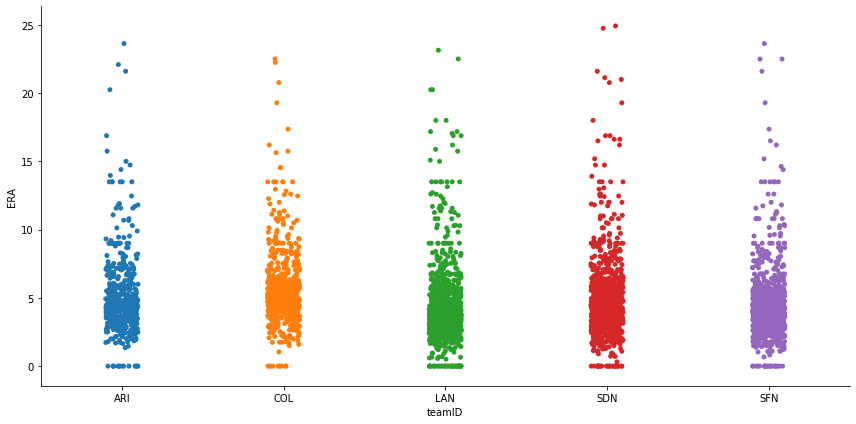

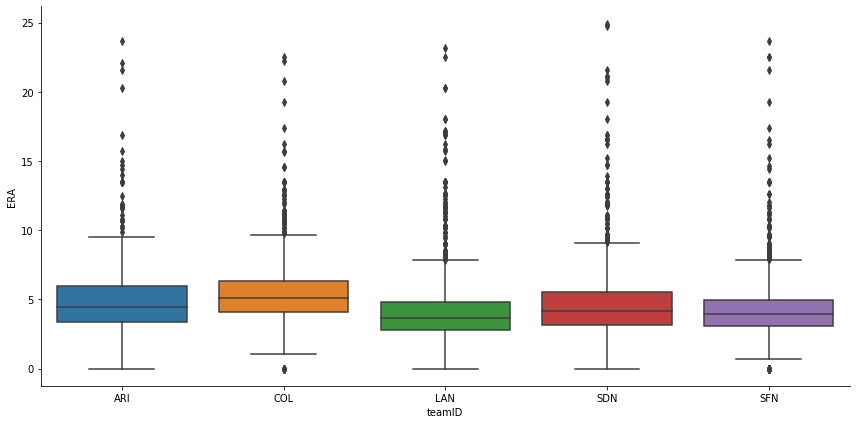

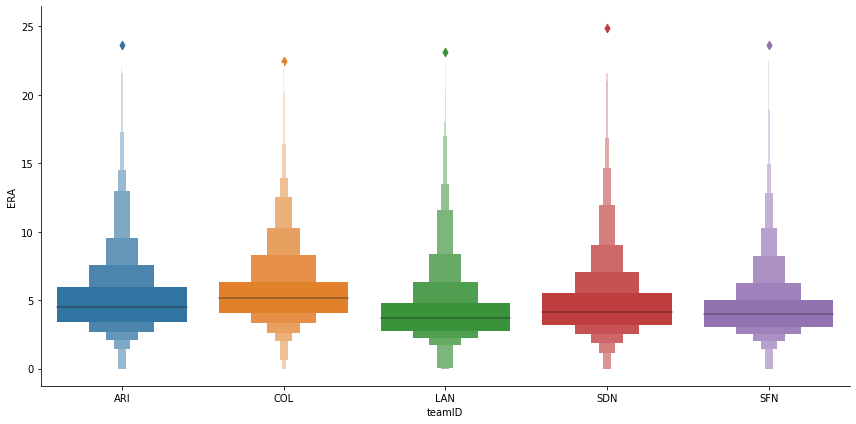

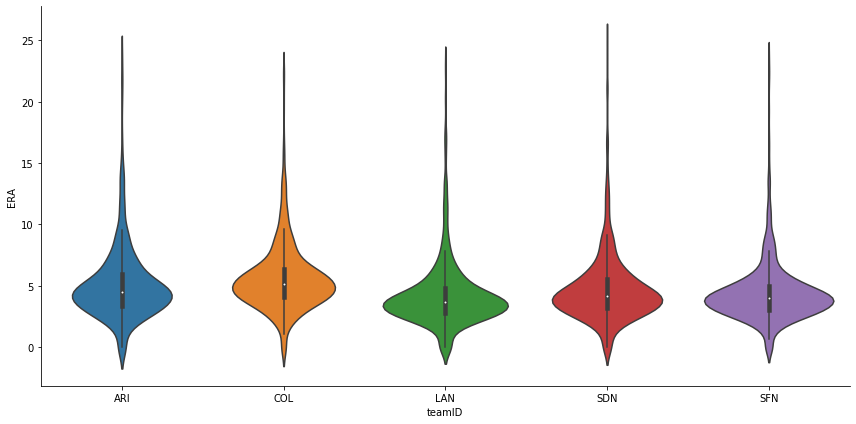

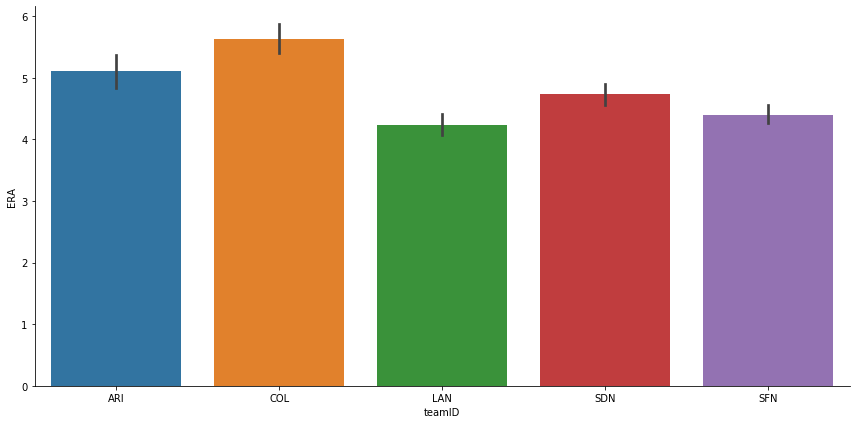

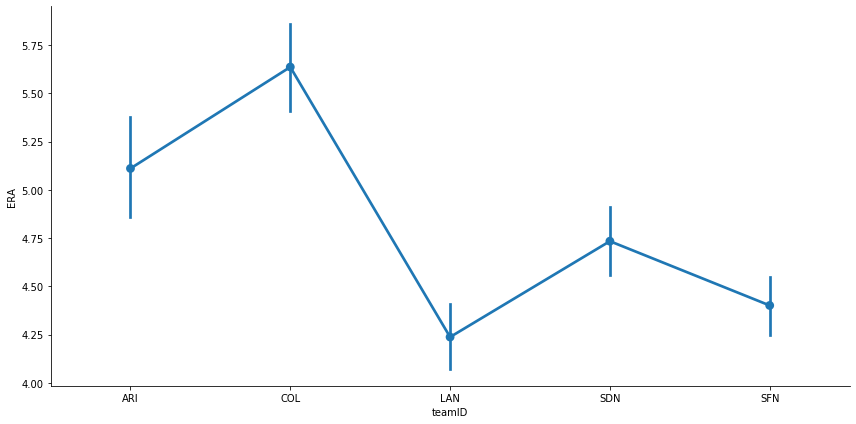

In [13]:
era_per_team(df, 25, min_year_thresh=0, max_year_thresh=1)

**Observations:**

The last plot is the clearest. It shows that the Los Angeles Dodgers had the lowest ERA for the year, while the Colorado Rockies had the highest ERA for the year. The box plot in plot two also shows this relationship, but it contains much more information. It shows that ERAs are concentrated around 5 with a large spread in outliers towards higher ERA count.

## Strike outs, balls, wins, and losses
Now, I will look at several variables together using a `pairplot` in Seaborn. Specifically, I will compare strike outs, balls, wins and losses for pitches in the National League West for the year 2018.

Including data for years 2017 - 2018.
Including data for teams in division nlwest.


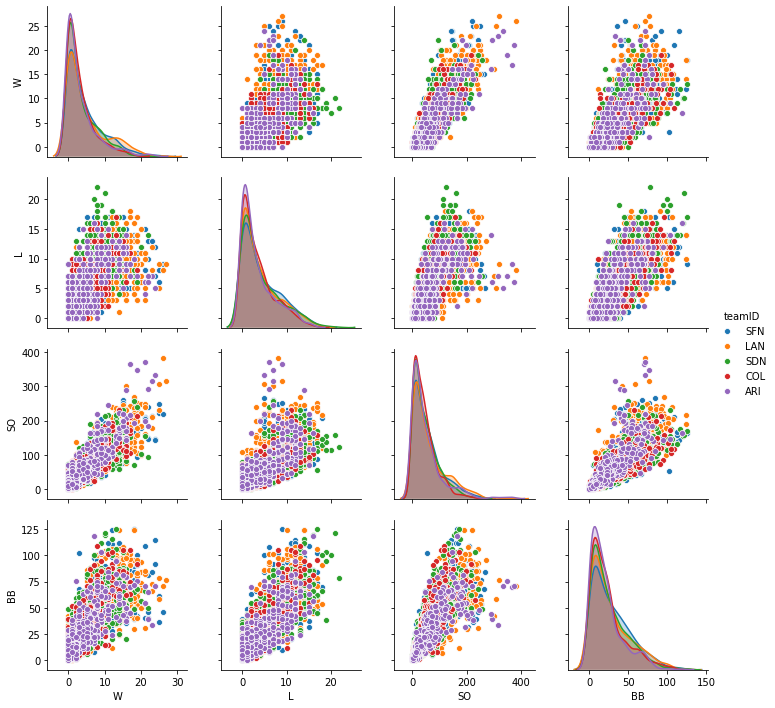

In [14]:
year_subset = create_year_subset(df, 0, 1)
div_subset = create_division_subset(df, 'nlwest')
sub_df = div_subset.loc[:, ['W', 'L', 'SO', 'BB', 'teamID']]

sns.pairplot(sub_df, hue='teamID')
plt.show()

**Observations:**

These plots show a lot of overlap for each team, especially in the histograms shown along the diagonal. Nevertheless, there are some noticeable trends. For example, for high strike out counts, there are fewer losses and more wins. Arizona and LA show the highest number of strike outs for the year. Pitches with high ball counts show fewer wins and more losses.